# Regression with PyTorch - Exercises

PyTorch is one of the most-used pthon library for deep learning, in a broad variety of applications.

Even though it is not designed for simple regression problems, it can be used to solve such tasks. 

### Setup

The following lines import the packages required in this exercise.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
import time
%matplotlib inline

### Regression using PyTorch

#### Data Creation

We explore linear regression in PyTorch using the same problem description as previously in exercise "01_linear_regression".

You are welcome to copy the code to create training data arrays ``X_train`` and ``y_train``.

(Once again, use parameter values ``w0=2.0``, ``w1=1.5`` and add Gaussian noise of standard deviation 0.15 to the y-values.)

In [2]:
# number of input samples
n_samples = 15

### YOUR SOLUTION HERE
# x_1 values in the range (0, 10)
# constants x_0 of the same shape as x_1
# input data X
# true model parameters
# output data y 

x1_train  = np.random.uniform(0, 10, size=(n_samples, 1))
x0_train = np.ones(shape=(n_samples, 1))
x_train = np.concatenate([x0_train, x1_train], axis=1)

w_true = np.array([2.0,1.5])
w_true  = w_true.reshape(2,1)

y_train = np.matmul(x_train, w_true)

y_train += np.random.normal(0,0.15, size  = y_train.shape)


### END OF SOLUTION

Next, we convert the training data (x- and y-values) into a PyTorch Tensors, which is necessary for subsequent use with the PyTorch library.

In [3]:
training_data_x = torch.Tensor(x1_train) 
training_data_y = torch.Tensor(y_train)

In this exercise, the linear regression problem will not be solved using the closed form solution, but an iterative loss minimization approach.

Even though we have not covered the theory yet (we will do so next week),
a simple artificial neuron (without non-linear activation function) is methodically identical to basic linear regression.
A simple neural layer is implemented in PyTorch's class ``nn.Linear()``, and a single neuron model can be initialized by ``nn.Linear(1, 1)``.

First, implement the class ```LinearRegressor``` which inherits from ```nn.Module```. In the ```__init__``` function add a linear layer using ```nn.Linear()```. This layer takes a single input value x and outputs the corresponding prediction y_pred. Also implement the ```forward(self, x)``` for the forward pass of the regressor. For details see the documentation at https://pytorch.org/docs/stable/generated/torch.nn.Module.html.

In [4]:
### YOUR SOLUTION HERE
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
    
### END OF SOLUTION

Using the (parameter-free) constructor of our model class ``LinearRegressor``, the model can be initialized.

In this step, model parameters are initialized randomly.

In [5]:
regressor = LinearRegressor()

Next, we implement a method to plot the training progress during training using matplotlib and the Jupyter Matplotlib inline feature.

In [6]:
def update_viz(fig, axes, losses, training_data_x, training_data_y):
    x_viz = torch.linspace(0, 10, 100).reshape(-1, 1)
    y_viz = regressor(x_viz).detach().numpy()
    axes[0].cla()
    axes[1].cla()
    axes[0].set_xlim([0, 10])
    axes[0].set_ylim([0, 20])
    axes[1].set_xlim([0, 100])
    axes[1].set_ylim([0, 100])
    axes[1].plot(losses, label='mean squared error')
    axes[0].scatter(training_data_x.detach().numpy(), training_data_y.detach().numpy(), label='training samples')
    axes[0].plot(x_viz, y_viz, color='red', label='current model')
    axes[0].legend()
    axes[1].legend()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.001)

The following code block performs the training with PyTorch.

Using already implemented loss functions and gradients, the computed loss for model prediction's and training data is iteratively minimized, thereby finding the optimal training parameters.

During training, the training progress is illustrated below.

You can try different learning rates and also vary the training data to see how training process and convergence speed vary.

*Attention:* Model parameters are stored in the LinearRegressor instance. If you change the setup, re-initialize the model to reset the training progress.

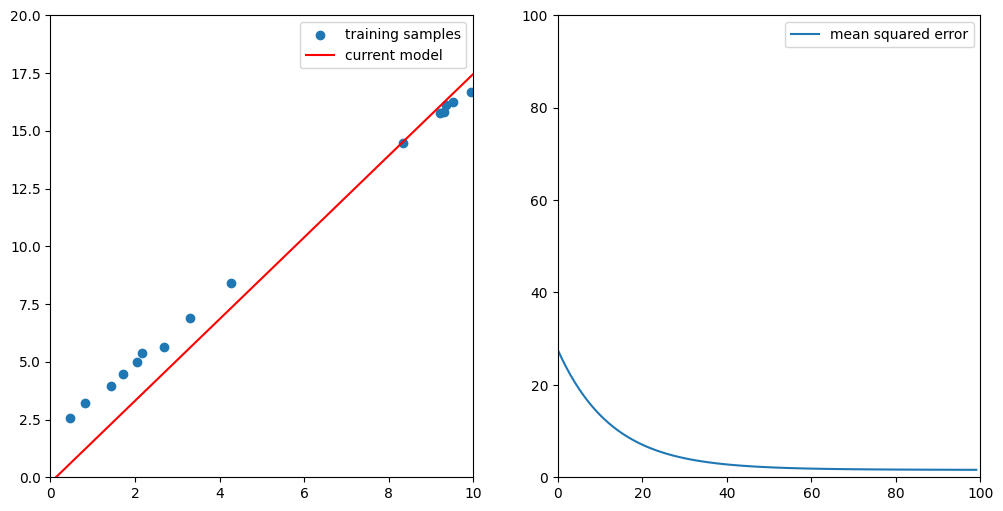

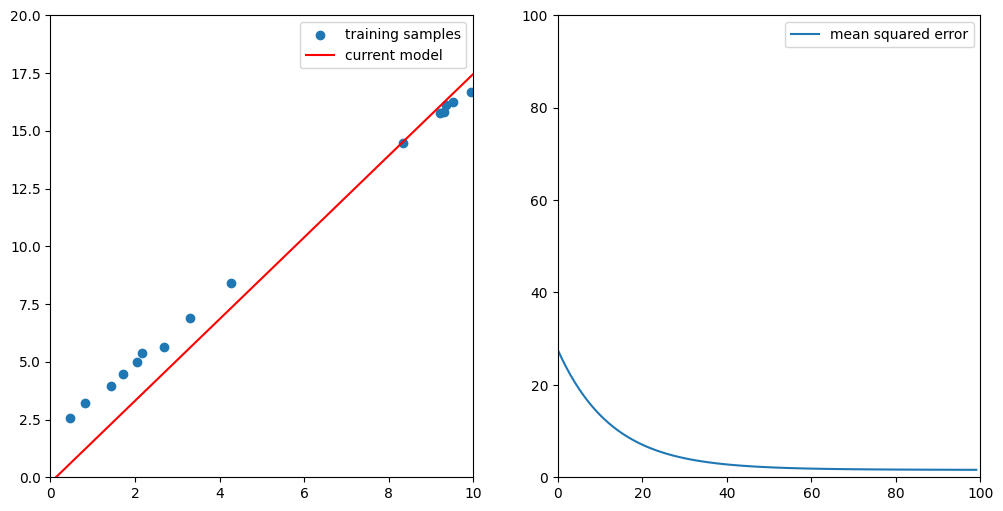

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
n_episodes = 100

loss_fn = nn.MSELoss()

learning_rate = 5e-4
optimizer = torch.optim.SGD(regressor.parameters(), lr=learning_rate)

losses = []
for i in range(n_episodes):

    x_train = training_data_x.reshape(-1, 1)
    y_train = training_data_y.reshape(-1, 1)
    
    # Training loop
    # Set gradients to zero (pytorch stores gradients for each parameter during backwards pass, they need to be explicitly set to zero before each training iteration)
    optimizer.zero_grad()
    # predict target values for the input training data
    y_pred = regressor(x_train)
    # compute loss (compare predicted targets to annotations)
    loss = loss_fn(y_pred, y_train)
    # perform backward pass -> compute gradients for each parameter)
    loss.backward()
    # perform optimizer step, i.e. adjust parameters values according to gradients
    optimizer.step()

    # store the loss of the performed training iteration (for plotting and tracking of training progress)
    losses.append(loss.detach().numpy())

    update_viz(fig, axes, losses, training_data_x, training_data_y)